In [125]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import animation
from IPython.display import HTML

plt.rcParams['figure.figsize'] = [16, 10]

In [126]:
N_LUT = 128
pole_pairs = 14

error_table = [0] * (N_LUT * pole_pairs)
flux_offset_table = [0] * N_LUT

def wrapTo2Pi(value):
    value = value % (2*np.pi)
    return value if value >= 0 else (value + 2*np.pi)


In [127]:
with open("calibration_data.log", "r") as f:
    data = f.readlines()

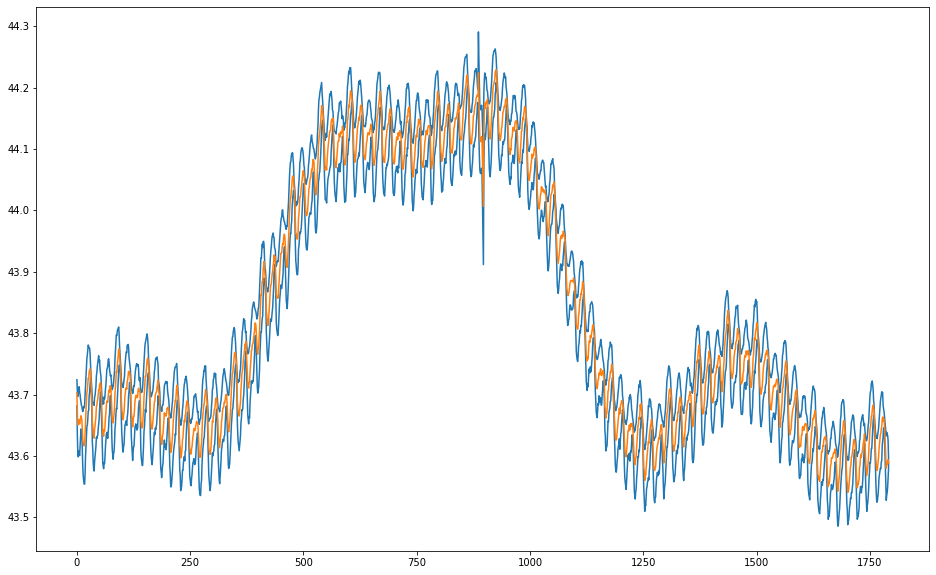

In [128]:
indices = []
xs = []
ys = []

for i, line in enumerate(data):
    x, y = line.split(": ")
    x = int(x)
    y = float(y)
    
    xs.append(x)
    ys.append(y)
    error_table[x] += y
    if i < N_LUT * pole_pairs:
        indices.append(i)

for i in range(len(error_table)):
    error_table[i] *= 0.5
    
plt.plot(xs, ys)
plt.plot(indices, error_table)


In [129]:

# Calculate average offset
flux_offset_sum = 0
for i in range(128 * 14):
    flux_offset_sum += error_table[i]

flux_offset = wrapTo2Pi(flux_offset_sum / (N_LUT * pole_pairs))

flux_offset

6.1360078915764475

In [130]:
window = N_LUT
# print(2*np.pi*pole_pairs, error_table[0])

lut_offset = int((2*np.pi*pole_pairs-error_table[0]) / (2*np.pi*pole_pairs) * N_LUT)

print(lut_offset)

87.96459430051421 43.7028385
64


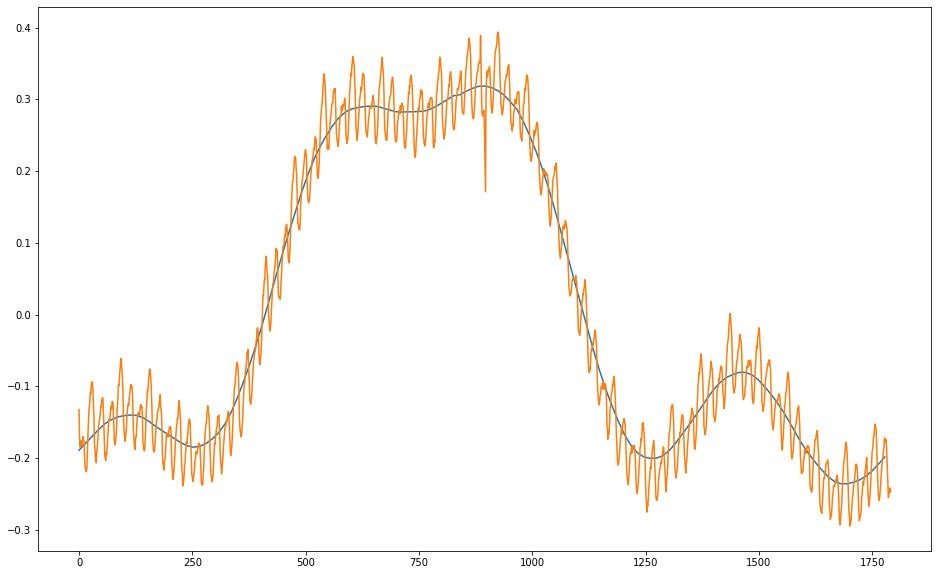

In [147]:
flux_offset_table_ = [0] * len(flux_offset_table)

for i in range(N_LUT):
    moving_avg = 0

    for j in range(int(-window/2), int(window/2)):
        index = int(i * pole_pairs * N_LUT / N_LUT + j)
        
        if (index < 0):
            index += 128 * 14  
        elif (index > 128 * 14 - 1):
            index -= 128 * 14
        moving_avg += error_table[index]
    
    moving_avg = moving_avg / window
    lut_index = lut_offset + i
    if (lut_index > (N_LUT-1)):
        lut_index -= N_LUT
    
    flux_offset_table[lut_index] = moving_avg - flux_offset
    flux_offset_table_[i] = moving_avg - flux_offset

#     print("{0} {1}".format(lut_index, moving_avg - flux_offset))

    
# plt.plot(np.array(range(N_LUT))*14, np.array(flux_offset_table) - np.array(flux_offset_table).mean())
plt.plot(np.array(range(N_LUT))*14, np.array(flux_offset_table_) - np.array(flux_offset_table).mean())
plt.plot(indices, np.array(error_table) - flux_offset - np.array(flux_offset_table).mean())